In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
train = pd.read_csv(io.BytesIO(uploaded['trainset.csv']), index_col=0)
uploaded = files.upload()
test = pd.read_csv(io.BytesIO(uploaded['test_x.csv']), index_col=0)
uploaded = files.upload()
sample = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))

Saving trainset.csv to trainset.csv


Saving test_x.csv to test_x.csv


Saving sample_submission.csv to sample_submission.csv


In [ ]:
train.head()

,name,year,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,selling_price
id,,,,,,,,,,,,,,,,,
0,Maruti,2017.0,47000.0,Central,Illinois,Chicago,Petrol,Individual,Manual,First_Owner,20.51,998.000000,67.04,90Nm@ 3500rpm,5.000000,Y,0.409999
1,Toyota,2016.0,55000.0,East,Maryland,Odenton,Diesel,Individual,Automatic,First_Owner,11.36,2755.000000,171.50,360Nm@ 1200-3400rpm,7.000000,N,1.575000
2,Mahindra,2015.0,40000.0,West,New Mexico,Las Cruces,Diesel,Individual,Automatic,First_Owner,18.49,0.092503,100.00,230Nm@ 1500-2250rpm,7.000000,N,0.700000
3,Maruti,2012.0,70000.0,South,Louisiana,Terrytown,Petrol,Individual,Manual,Second_Owner,19.70,796.000000,46.30,62Nm@ 3000rpm,5.000000,N,0.180000
4,Hyundai,2015.0,35000.0,East,Pennsylvania,Baldwin,Petrol,NaN,Manual,Second_Owner,17.70,1497.000000,113.42,144.15nm@ 4500rpm,0.860874,N,0.540000


In [ ]:
test.head()

,name,year,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
id,,,,,,,,,,,,,,,,
0,Maruti,2010,120000,West,New Mexico,Albuquerque,Diesel,Individual,Manual,Second_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N
1,Hyundai,2016,80000,South,Arkansas,Van Buren,Petrol,Individual,Manual,First_Owner,18.90,1197,82.00,114Nm@ 4000rpm,5,Y
2,Tata,2006,110000,Central,Nebraska,Kearney,Diesel,Individual,Manual,Third_Owner,16.80,1405,62.00,"12.5@ 2,500(kgm@ rpm)",5,N
3,Hyundai,2018,38426,West,California,Salinas,Petrol,Individual,Manual,First_Owner,17.19,1197,81.86,114.73Nm@ 4000rpm,5,N
4,Maruti,2016,90150,East,Massachusetts,Boston,Diesel,Individual,Manual,First_Owner,24.30,1248,88.50,200Nm@ 1750rpm,5,N


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 0 to 6323
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               6236 non-null   object 
 1   year               6238 non-null   float64
 2   km_driven          6252 non-null   float64
 3   Region             6239 non-null   object 
 4   State or Province  6249 non-null   object 
 5   City               6242 non-null   object 
 6   fuel               6257 non-null   object 
 7   seller_type        6238 non-null   object 
 8   transmission       6252 non-null   object 
 9   owner              6233 non-null   object 
 10  mileage            6246 non-null   float64
 11  engine             6250 non-null   float64
 12  max_power          6249 non-null   float64
 13  torque             6249 non-null   object 
 14  seats              6246 non-null   float64
 15  sold               6244 non-null   object 
 16  selling_price      6324 non-n

In [ ]:
train.fillna(method='bfill', inplace=True)

<ipython-input-12-3f8e6918f913>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method='bfill', inplace=True)


In [ ]:
train_test_concat = pd.concat([train, test])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_feature = train_test_concat.dtypes[train_test_concat.dtypes=='object'].index.values
for feature in categorical_feature:
  train_test_concat[feature] = le.fit_transform(train_test_concat[feature])
train_encoded = train_test_concat[:len(train)]
test_encoded = train_test_concat[len(train):]
test_encoded = test_encoded.drop(['selling_price'], axis=1)

In [ ]:
for col in train_encoded.columns:
  q1 = train_encoded[col].quantile(0.0001)
  q3 = train_encoded[col].quantile(0.9999)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  train_encoded = train_encoded[(train_encoded[col] >= lower_bound) & (train_encoded[col] <= upper_bound)]

In [ ]:
train_x = train_encoded.drop('selling_price', axis=1)
train_y = train_encoded['selling_price']

In [ ]:
train_x.isnull().sum()

,0
name,0
year,0
km_driven,0
Region,0
State or Province,0
City,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(train_x, train_y)
score = model.score(train_x, train_y)
print(score)

0.9924370257547913


In [ ]:
y = model.predict(test_encoded)
sample['selling_price'] = y
sample.to_csv('submission.csv', index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

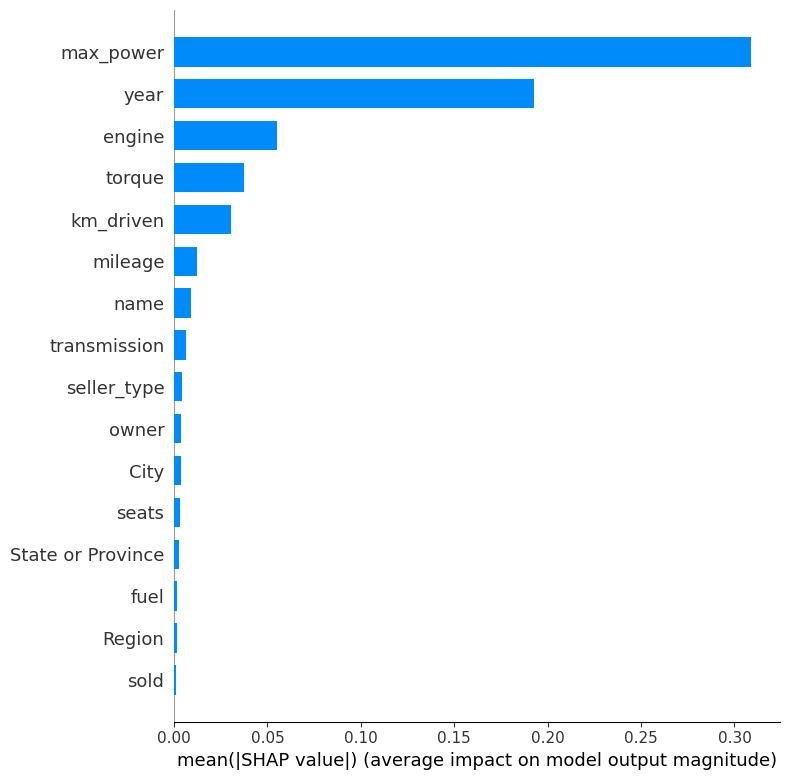

In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_x)
shap.summary_plot(shap_values, train_x, plot_type="bar")

In [ ]:
train_x.drop(['fuel', 'Region', 'sold'], axis=1, inplace=True)
test.drop(['fuel', 'Region', 'sold'], axis=1, inplace=True)

In [ ]:
train_x.drop(['name'], axis=1, inplace=True)
test.drop(['name'], axis=1, inplace=True)

In [ ]:
train_x.drop(['seller_type', 'owner', 'City', 'seats', 'State or Province'], axis=1, inplace=True)
test.drop(['seller_type', 'owner', 'City', 'seats', 'State or Province'], axis=1, inplace=True)

In [ ]:
model = RandomForestRegressor()
model.fit(train_x, train_y)
score = model.score(train_x, train_y)
print(score)

0.9929591549470543


In [ ]:
sample['selling_price'] = y
sample.to_csv('submission.csv', index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_x2.isnull().sum()

,0
name,0
year,86
km_driven,72
Region,0
State or Province,0
City,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
train_x2 = imputer.fit_transform(train_x2)
train_x2 = pd.DataFrame(train_x2, columns=train_x.columns)
train_x2.isnull().sum()

,0
name,0
year,0
km_driven,0
Region,0
State or Province,0
City,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
model2 = RandomForestRegressor()
model2.fit(train_x2, train_y2)
score2 = model2.score(train_x2, train_y2)
print(score2)

0.9931313410551471


In [ ]:
y = model2.predict(test)
sample['selling_price'] = y
sample.to_csv('submission.csv', index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>